In [52]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [53]:
#Reading CSV file
df = pd.read_csv('htrain.csv')

In [54]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [55]:
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [56]:
df = df.head(5000)

In [57]:
#Dropping unwanted columns
df = df.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'])

In [58]:
df.head(10)

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
5,We had - rooms. One was very nice and clearly ...,happy
6,My husband and I have stayed in this hotel a f...,not happy
7,My wife & I stayed in this glorious city a whi...,happy
8,My boyfriend and I stayed at the Fairmont on a...,happy
9,"Wonderful staff, great location, but it was de...",not happy


In [59]:
df = df.rename(columns={"Description": "review", "Is_Response": "response"})

In [60]:
print ('Shape = >',df.shape)

Shape = > (5000, 2)


In [61]:
print ('Happy and Not Happy counts','\n',df.response.value_counts())

Happy and Not Happy counts 
 happy        3408
not happy    1592
Name: response, dtype: int64


In [62]:
#Ratio
print ('Happy ratio = ', round(len(df[df['response']=='happy']) / len(df.response),2)*100,'%')
print ('Not happy ratio  = ', round(len(df[df['response']=='not happy']) / len(df.response),2)*100,'%')

Happy ratio =  68.0 %
Not happy ratio  =  32.0 %


In [63]:
#Adding New column for Length of review
df['length'] = df.review.str.len()
df.head(5)

,review,response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [64]:
# Convert all reviews to lower case
df['review'] = df['review'].str.lower()

In [65]:
# Replace URLs with 'webaddress'
df['review'] = df['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['review'] = df['review'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['review'] = df['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['review'] = df['review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [66]:
# Remove punctuation
df['review'] = df['review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['review'] = df['review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['review'] = df['review'].str.replace(r'^\s+|\s+?$', '')

In [67]:
df.head()

,review,response,length
0,the room was kind of clean but had a very stro...,not happy,248
1,i stayed at the crown plaza april april the st...,not happy,1077
2,i booked this hotel through hotwire at the low...,not happy,1327
3,stayed here with husband and sons on the way t...,happy,502
4,my girlfriends and i stayed here to celebrate ...,not happy,1613


In [68]:
# Removing stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['review'] = df['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [69]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [70]:
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [71]:
df.head()

,review,response,length
0,room kind clean strong smell dogs generally av...,not happy,248
1,stayed crown plaza april april staff friendly ...,not happy,1077
2,booked hotel hotwire lowest price could find g...,not happy,1327
3,stayed husband sons way alaska cruise loved ho...,happy,502
4,girlfriends stayed celebrate th birthdays plan...,not happy,1613


In [72]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [73]:
# clean text data
df["review_clean"] = df["review"].apply(lambda x: clean_text(x))

In [74]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.review.str.len()
df.head()

,review,response,length,review_clean,clean_length
0,room kind clean strong smell dogs generally av...,not happy,248,room kind clean strong smell dog generally ave...,140
1,stayed crown plaza april april staff friendly ...,not happy,1077,stay crown plaza april april staff friendly at...,649
2,booked hotel hotwire lowest price could find g...,not happy,1327,booked hotel hotwire low price could find got ...,791
3,stayed husband sons way alaska cruise loved ho...,happy,502,stayed husband son way alaska cruise love hote...,333
4,girlfriends stayed celebrate th birthdays plan...,not happy,1613,girlfriend stay celebrate th birthday plan wee...,981


In [75]:
# calculating Total length 
print ('Original Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Original Length 4408336
Clean Length 2686503


In [76]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df["sentiments"] = df["review_clean"].apply(lambda x: sia.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [77]:
# add number of characters column
df["chars"] = df["review_clean"].apply(lambda x: len(x))

# add number of words column
df["words"] = df["review_clean"].apply(lambda x: len(x.split(" ")))

In [78]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
df_doc2vec = df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
df_doc2vec.columns = ["doc2vec_vector_" + str(x) for x in df_doc2vec.columns]
df = pd.concat([df, df_doc2vec], axis=1)

In [79]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [80]:
df.head()

,review,response,length,review_clean,clean_length,neg,neu,pos,compound,chars,...,word_yet,word_yogurt,word_york,word_yorker,word_young,word_yr,word_yummy,word_zero,word_zone,word_zoo
0,room kind clean strong smell dogs generally av...,not happy,248,room kind clean strong smell dog generally ave...,140,0.000,0.457,0.543,0.9501,134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,stayed crown plaza april april staff friendly ...,not happy,1077,stay crown plaza april april staff friendly at...,649,0.021,0.838,0.141,0.8957,617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,booked hotel hotwire lowest price could find g...,not happy,1327,booked hotel hotwire low price could find got ...,791,0.076,0.757,0.167,0.9118,760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,stayed husband sons way alaska cruise loved ho...,happy,502,stayed husband son way alaska cruise love hote...,333,0.020,0.506,0.474,0.9897,320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,girlfriends stayed celebrate th birthdays plan...,not happy,1613,girlfriend stay celebrate th birthday plan wee...,981,0.061,0.765,0.174,0.9497,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df.shape
print ('Total Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())
print ('Total Positives', df.pos.sum())
print ('Total Negatives', df.neg.sum())
print ('Total Neutral', df.neu.sum())

Total Length 4408336
Clean Length 2686503
Total Positives 1532.123
Total Negatives 285.455
Total Neutral 3182.406


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [83]:
df.head()

,review,response,length,review_clean,clean_length,neg,neu,pos,compound,chars,...,word_yet,word_yogurt,word_york,word_yorker,word_young,word_yr,word_yummy,word_zero,word_zone,word_zoo
0,room kind clean strong smell dogs generally av...,not happy,248,room kind clean strong smell dog generally ave...,140,0.000,0.457,0.543,0.9501,134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,stayed crown plaza april april staff friendly ...,not happy,1077,stay crown plaza april april staff friendly at...,649,0.021,0.838,0.141,0.8957,617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,booked hotel hotwire lowest price could find g...,not happy,1327,booked hotel hotwire low price could find got ...,791,0.076,0.757,0.167,0.9118,760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,stayed husband sons way alaska cruise loved ho...,happy,502,stayed husband son way alaska cruise love hote...,333,0.020,0.506,0.474,0.9897,320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,girlfriends stayed celebrate th birthdays plan...,not happy,1613,girlfriend stay celebrate th birthday plan wee...,981,0.061,0.765,0.174,0.9497,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
positive=[]
negative=[]
neutral=[]
for i in df['review']:
    sia=SentimentIntensityAnalyzer()
    positive.append(sia.polarity_scores(i)['pos'])
    negative.append(sia.polarity_scores(i)['neg'])
    neutral.append(sia.polarity_scores(i)['neu'])
print(sum(positive))
print(sum(negative))
print(sum(neutral))

1511.9139999999968
275.59999999999934
3212.486000000006


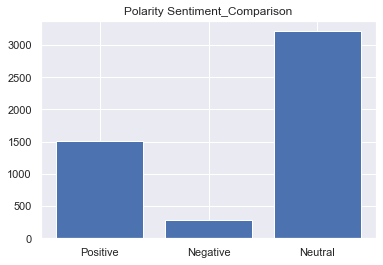

In [85]:
df_polarity=pd.DataFrame({'Positive':[sum(positive)], 'Negative':[sum(negative)], 'Neutral':[sum(neutral)]})
plt.figure()
v=[sum(positive), sum(negative), sum(neutral)]
pol=['Positive','Negative','Neutral']
plt.bar(pol,v)
plt.title('Polarity Sentiment_Comparison')
plt.show()

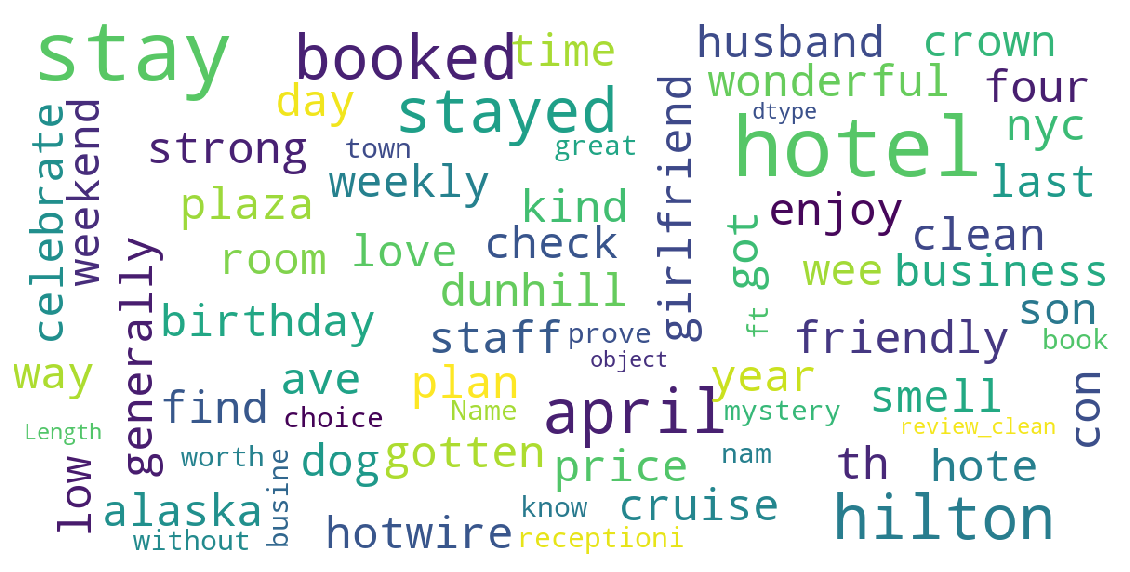

In [86]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 5000,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 12)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["review_clean"])

In [87]:
# feature selection
label = "response"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in df.columns if c not in ignore_cols]

# splitting the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)

In [88]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
4,pos,0.058140
5,compound,0.037842
2,neg,0.034951
3,neu,0.022911
10,doc2vec_vector_2,0.019550
12,doc2vec_vector_4,0.017407
1143,word_great,0.010896
0,length,0.007991
2178,word_room,0.007780
6,chars,0.007233


In [89]:
import gensim

from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer

# writing function for the entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result
        

In [90]:
#from gensim import models.wrappers
stemmer = SnowballStemmer("english")
result=[]
for doc in df['review_clean']:
        for token in gensim.utils.simple_preprocess(doc):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
                result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token)))
            


In [91]:
processed_docs = []
for doc in df['review_clean']:
        processed_docs.append(preprocess(doc))

In [92]:
len(processed_docs)

5000

In [93]:
print(processed_docs[:2])

[['room', 'kind', 'clean', 'strong', 'smell', 'general', 'averag', 'overnight', 'stay', 'fussi', 'consid', 'stay', 'price', 'right', 'breakfast', 'free', 'good'], ['stay', 'crown', 'plaza', 'april', 'april', 'staff', 'friend', 'attent', 'elev', 'tini', 'food', 'restaur', 'delici', 'price', 'littl', 'high', 'cours', 'washington', 'pool', 'littl', 'child', 'room', 'fifth', 'floor', 'comfort', 'plenti', 'space', 'person', 'littl', 'small', 'today', 'standard', 'limit', 'number', 'channel', 'small', 'mold', 'bathtub', 'area', 'remov', 'littl', 'bleach', 'appear', 'carpet', 'vacum', 'report', 'light', 'bulb', 'burn', 'replac', 'machin', 'number', 'floor', 'floor', 'work', 'encount', 'staff', 'elev', 'even', 'mention', 'machin', 'severel', 'hour', 'later', 'maid', 'appear', 'door', 'mint', 'sure', 'know', 'room', 'littl', 'unnerv', 'stay', 'busi', 'come', 'vacat']]


In [94]:
# Dictionary on a dataset
dictionary=gensim.corpora.Dictionary(processed_docs)

In [95]:
#Lets see if dictionary created succesfully
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 averag
1 breakfast
2 clean
3 consid
4 free
5 fussi
6 general
7 good
8 kind
9 overnight
10 price
11 right
12 room
13 smell
14 stay
15 strong
16 appear
17 april
18 area
19 attent
20 bathtub


In [96]:
#remove rare and repeatative words
dictionary.filter_extremes(no_below=15,no_above=0.1,keep_n=500000)

In [97]:
print (dictionary)

Dictionary(1739 unique tokens: ['averag', 'consid', 'general', 'kind', 'overnight']...)


In [98]:
#Create the Bag-of-words model for each document Save this to 'bow_corpus'
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [99]:
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [100]:
#preview 
document_num = 50
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], dictionary[bow_doc_x[i][0]], bow_doc_x[i][1]))

Word 23 ("later") appears 2 time.
Word 62 ("manag") appears 1 time.
Word 75 ("forget") appears 1 time.
Word 119 ("request") appears 1 time.
Word 152 ("fanci") appears 1 time.
Word 155 ("noisi") appears 2 time.
Word 226 ("airport") appears 1 time.
Word 265 ("nois") appears 1 time.
Word 313 ("shuttl") appears 1 time.
Word 414 ("tough") appears 1 time.
Word 431 ("issu") appears 1 time.
Word 584 ("comp") appears 1 time.
Word 620 ("nearbi") appears 1 time.
Word 625 ("complain") appears 1 time.
Word 856 ("agre") appears 1 time.
Word 857 ("awhil") appears 1 time.
Word 858 ("credit") appears 1 time.
Word 859 ("email") appears 1 time.


In [101]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [102]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"beauti" + 0.009*"wine" + 0.008*"wonder" + 0.007*"valet" + 0.007*"thank" + 0.006*"internet" + 0.006*"welcom" + 0.006*"conveni" + 0.006*"husband" + 0.006*"feel"


Topic: 1 
Words: 0.014*"airport" + 0.013*"shuttl" + 0.010*"charg" + 0.007*"reserv" + 0.006*"downtown" + 0.006*"avail" + 0.006*"wonder" + 0.006*"rate" + 0.006*"chicago" + 0.005*"reason"


Topic: 2 
Words: 0.016*"manag" + 0.008*"reserv" + 0.008*"wonder" + 0.007*"wait" + 0.006*"person" + 0.006*"care" + 0.006*"concierg" + 0.006*"housekeep" + 0.006*"charg" + 0.006*"famili"


Topic: 3 
Words: 0.013*"build" + 0.012*"station" + 0.011*"subway" + 0.008*"light" + 0.007*"state" + 0.007*"york" + 0.006*"metro" + 0.006*"long" + 0.006*"empir" + 0.006*"airport"


Topic: 4 
Words: 0.010*"elev" + 0.010*"pretti" + 0.009*"window" + 0.009*"tini" + 0.007*"open" + 0.006*"nois" + 0.006*"wall" + 0.005*"quiet" + 0.005*"differ" + 0.005*"avail"


Topic: 5 
Words: 0.016*"center" + 0.011*"distanc" + 0.009*"downtown" + 0.009*"nois" + 0